<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo 24** | Combinação de modelos II | AdaBoost vs GBM
Caderno de **exercício 02**<br>




## Discente: Samuel Saturno


<h3><font  color="bronw"><strong>1. Cite 5 diferenças entre o AdaBooste o GBM.</strong></font></h3>

<h4><font  color=""><strong>AdaBoost (Adaptive Boosting) e GBM (Gradient Boosting Machine) são ambos algoritmos de aprendizado de máquina que pertencem à família de técnicas de boosting, mas eles têm algumas diferenças importantes:</strong></font></h4>

**1. Função de perda:**

<h4><font  color=""><i>

* AdaBoost: Utiliza uma função de perda exponencial, o que torna o algoritmo sensível a outliers.
* GBM: Permite uma gama mais ampla de funções de perda, incluindo as mais comuns, como a função de perda de desvio ou função de perda exponencial.

</i></font></h4>

**2. Abordagem de ajuste:**

<h4><font  color=""><i>

* AdaBoost: Ajusta os pesos dos exemplos de treinamento a cada iteração, dando mais peso aos exemplos mal classificados nas iterações anteriores.
* GBM: Ajusta os modelos em cada iteração, minimizando diretamente a função de perda usando métodos de otimização de gradiente descendente.

</i></font></h4>

**3. Número de estimadores base:**

<h4><font  color=""><i>

* AdaBoost: Pode usar uma variedade de estimadores base, mas é comum usar árvores de decisão simples.
* GBM: Também pode usar uma variedade de estimadores base, mas é mais comumente usado um único tipo, geralmente árvores de decisão profundas.
</i></font></h4>

**4. Pesos dos exemplos:**

<h4><font  color=""><i>

* AdaBoost: Atribui pesos a cada exemplo de treinamento, dando mais peso aos exemplos que são difíceis de classificar.
* GBM: Não atribui pesos aos exemplos de treinamento, mas ajusta os modelos com base nos erros residuais.

</i></font></h4>

**5. Forma como os modelos são combinados:**

<h4><font  color=""><i>

* AdaBoost: Combina os modelos por meio de uma votação ponderada, onde modelos mais precisos recebem mais peso.
* GBM: Combina os modelos aditivamente, ou seja, adiciona iterativamente modelos que melhoram o desempenho global do conjunto.

</i></font></h4>



<h5><font  color=""><strong>Referências Bibliográticas (visto em 20/04/2024)</strong></font></h5>

<h6><font  color="blue"><strong>Sites:</strong></font></h6>

https://scikit-learn.org/stable/modules/ensemble.html






<h3><font  color="Bronw"><strong> 2. Acesse o link Scikit-learn–GBM, leia a explicação (traduza se for preciso) e crie um jupyternotebook contendo o exemplo de classificação e de regressão do GBM. </strong></font></h3>







In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

# Gerando dados de exemplo usando make_friedman1, uma função de geração de dados sintéticos.
# Essa função cria um conjunto de dados com características não lineares.
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)

# Dividindo os dados em conjuntos de treinamento e teste.
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

# Inicializando o modelo GradientBoostingRegressor com os parâmetros especificados.
# O modelo utilizará 100 estimadores, cada um com uma profundidade máxima de 1.
# O learning_rate controla a taxa de aprendizado do algoritmo.
# O parâmetro loss indica a função de perda a ser otimizada, neste caso, 'squared_error' para minimizar o erro quadrático médio.
est = GradientBoostingRegressor(
    n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0,
    loss='squared_error'
)

# Ajustando o modelo aos dados de treinamento.
est.fit(X_train, y_train)

# Calculando o erro quadrático médio entre as previsões do modelo e os verdadeiros valores de y nos dados de teste.
mse = mean_squared_error(y_test, est.predict(X_test))

# Imprimindo o erro quadrático médio.
print("Mean Squared Error:", mse)


Mean Squared Error: 5.009154859960321




**Gradient Boosting regression**

https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regression.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regression-py

In [2]:
# Author: Peter Prettenhofer <peter.prettenhofer@gmail.com>
#         Maria Telenczuk <https://github.com/maikia>
#         Katrina Ni <https://github.com/nilichen>
#
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [3]:
# Carregando os dados
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [4]:
# Pré-processamento dos dados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=13
)

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [5]:
# Ajuste do modelo de regressão
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 3027.2152


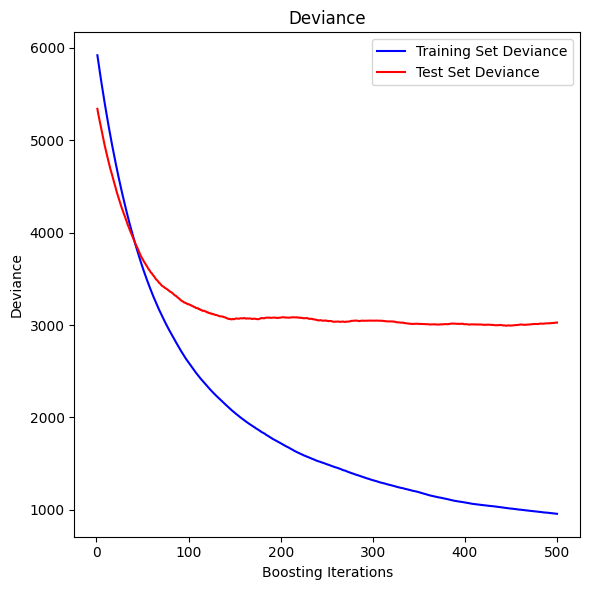

In [6]:
# Visualização do gráfico
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

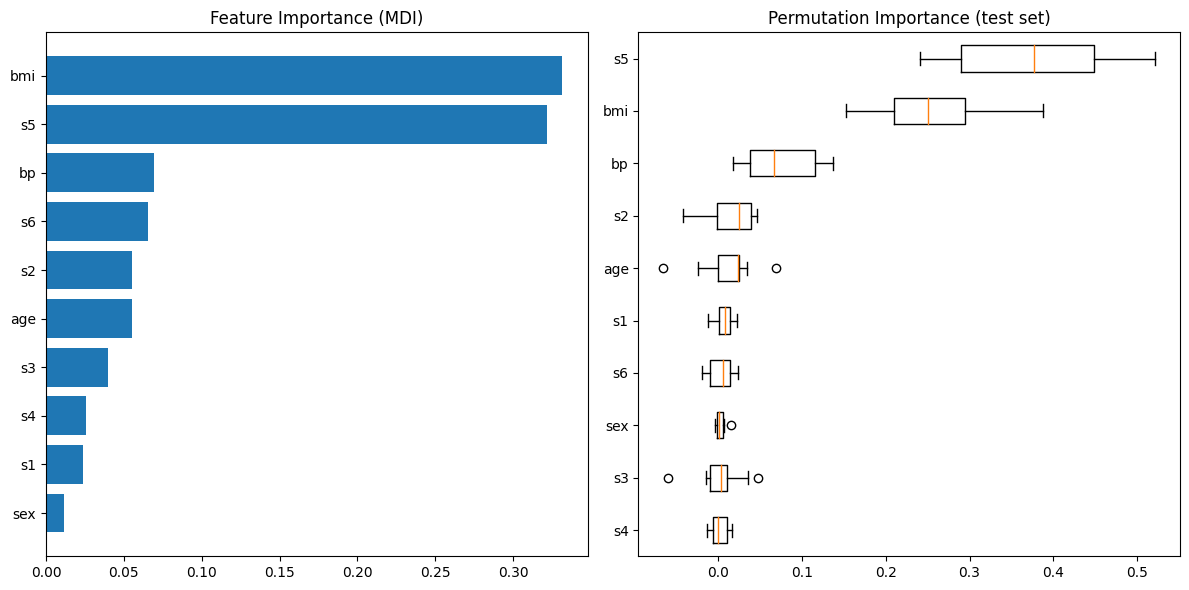

In [7]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(diabetes.feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(diabetes.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

<h3><font  color="bronw"><strong>3. Cite 5 Hyperparametrosimportantes no GBM.</strong></font></h3>


**1. learning_rate:**

<h4><font  color=""><i>

* O learning_rate controla a taxa de aprendizado do algoritmo, encolhendo a contribuição de cada árvore no ensemble. Valores menores geralmente exigem mais árvores para o modelo convergir, mas podem levar a um modelo mais robusto.

</i></font></h4>

**2. n_estimators:**

<h4><font  color=""><i>

* Este hiperparâmetro indica o número de estágios de boosting a serem realizados. Um número maior de estimadores geralmente resulta em um desempenho melhor, mas há um ponto em que o aumento do número de estimadores pode levar ao overfitting.

</i></font></h4>

**3. subsample:**

<h4><font  color=""><i>

* Representa a fração de amostras a serem usadas para ajustar os modelos base individuais. Valores menores que 1.0 resultam em Stochastic Gradient Boosting, o que pode ajudar a reduzir a variância do modelo.

</i></font></h4>

**4. max_depth:**

<h4><font  color=""><i>

* Define a profundidade máxima das árvores de decisão individuais no ensemble. Controlar a profundidade pode ajudar a evitar overfitting e ajustar a complexidade do modelo.

</i></font></h4>

**5. criterion:**

<h4><font  color=""><i>

* Indica a função usada para medir a qualidade de uma divisão. As opções incluem 'friedman_mse' para o erro quadrático médio com pontuação de melhoria por Friedman, e 'squared_error' para o erro quadrático médio. Escolher a função correta pode influenciar a eficácia do algoritmo em diferentes conjuntos de dados.

</i></font></h4>



<h5><font  color=""><strong>Referências Bibliográticas (visto em 20/04/2024)</strong></font></h5>

<h6><font  color="blue"><strong>Sites:</strong></font></h6>

https://scikit-learn.org/stable/modules/ensemble.html

<h3><font  color="bronw"><strong>4.(Opcional) Utilize o GridSearchpara encontrar os melhores hyperparametrospara o conjunto de dados do exemplo</strong></font></h3>


In [8]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Gerando os dados de exemplo
X, y = make_friedman1(n_samples=1200, random_state=0, noise=1.0)

# Definindo os conjuntos de treinamento e teste
X_train, X_test = X[:200], X[200:]
y_train, y_test = y[:200], y[200:]

# Definindo os hiperparâmetros para GridSearch
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5]
}

# Inicializando o modelo GradientBoostingRegressor
gbm = GradientBoostingRegressor()

# Inicializando o GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')

# Ajustando o GridSearch aos dados de treinamento
grid_search.fit(X_train, y_train)

# Obtendo os melhores hiperparâmetros
best_params = grid_search.best_params_

# Criando um novo modelo com os melhores hiperparâmetros encontrados
best_gbm = GradientBoostingRegressor(**best_params)

# Treinando o modelo final nos dados de treinamento
best_gbm.fit(X_train, y_train)

# Calculando o erro quadrático médio nos dados de teste
mse = mean_squared_error(y_test, best_gbm.predict(X_test))

print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)


Best Hyperparameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Mean Squared Error: 4.073475465179768


**Insight:**

<h4><font  color=""><i>

* Podemos observar que ao ajustar um modelo Gradient Boosting para o conjunto de dados de exemplo, os melhores hiperparâmetros encontrados foram {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}.

* learning rate mais baixo, uma profundidade máxima de árvore moderada e um número maior de estimadores resultaram em melhor desempenho de generalização, conforme indicado pelo erro quadrático médio de 4.0735 nos dados de teste.

* Em tese o processo de aprendizado mais lento, combinado com uma modelagem mais rasa e complexa, foi mais eficaz para capturar as relações nos dados, evitando overfitting.

</i></font></h4>




<h3><font  color="bronw"><strong>
5. Acessando o artigo do Jerome Friedman (Stochastic) e pensando no nome dado ao StochasticGBM, qual é a maior diferença entre os dois algoritmos?
</strong></font></h3>


<h4><font color=""><i>
A maior diferença entre o algoritmo descrito no artigo de Jerome Friedman e o Stochastic Gradient Boosting Machine (StochasticGBM) está na introdução de aleatoriedade durante o processo de treinamento.

No artigo original de Friedman sobre Gradient Boosting, o algoritmo segue um procedimento determinístico, onde cada árvore de decisão é ajustada sequencialmente para corrigir os erros residuais do conjunto anterior. Não há introdução de aleatoriedade durante o treinamento das árvores individuais.

Por outro lado, no Stochastic Gradient Boosting Machine, a aleatoriedade é introduzida através do subamostragem das observações (bootstrap) e/ou das características (subsample) durante o ajuste de cada árvore. Isso significa que em cada etapa de ajuste, apenas uma parte das observações ou características é considerada, tornando o processo de treinamento mais rápido e potencialmente mais robusto contra overfitting.

Portanto, a principal diferença entre os dois algoritmos reside na abordagem de introdução de aleatoriedade durante o treinamento das árvores de decisão, o que caracteriza o Stochastic Gradient Boosting Machine como uma extensão estocástica do algoritmo original de Gradient Boosting proposto por Friedman.
</i></font></h4>